测试和查看NS3中跑出来的数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [6]:
data = pd.read_csv('/Users/shenheng/Code/NN/Lab/log_rx0_data_v2x.csv',
                   sep=';')
data_attacker = data[data['attackType']==1] # 攻击车
data_normal = data[data['attackType']==0]   # 普通车
data_attacker = data_attacker.iloc[:, data_attacker.columns.str.contains('Pos')]
data_normal = data_normal.iloc[:, data_normal.columns.str.contains('Pos')]
data

,RxId,RxTime,attackType,TxId,TxTime,TxxPos,TxyPos,TxxVel,TxyVel
0,0,2098,1,2,2094,100.000,100,-10,0
1,0,2198,1,2,2194,100.000,100,-10,0
2,0,2298,1,2,2294,100.000,100,-10,0
3,0,2398,1,2,2394,100.000,100,-10,0
4,0,2498,1,2,2494,100.000,100,-10,0
...,...,...,...,...,...,...,...,...,...
276,0,9925,0,4,9921,253.815,103,15,0
277,0,9978,0,3,9974,200.260,97,-10,0
278,0,9998,1,2,9994,100.000,100,-10,0
279,0,10021,0,1,10017,200.170,101,10,0


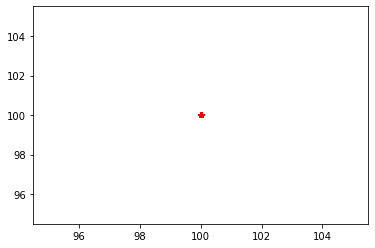

In [4]:
a_x = data_attacker['TxxPos'].values
a_y = data_attacker['TxyPos'].values
plt.plot(a_x, a_y, 'r*')
plt.show()

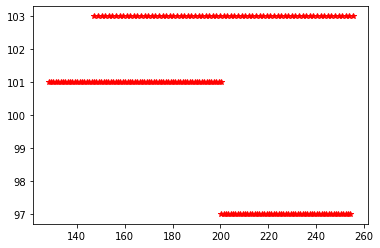

In [5]:
n_x = data_normal['TxxPos'].values
n_y = data_normal['TxyPos'].values
plt.plot(n_x, n_y, 'r*')
plt.show()

目前的问题是：移动轨迹以及广播模型能够比较完美的给出了，但是移动轨迹过于简单。
另外，如果需要复杂的移动轨迹以及多辆车的话，就需要巨大的人工标注的工作量
所以接下来的主要问题就是，生成足够的移动模型，最好基于某个实际地图，这样的话通过位置与速度判断的算法才能够使用
难点在于两个：一是选取哪个地图并对其进行坐标化
            二是如何能够快速并大量的坐标化，我们可能需要数十万的数据才行

现在考虑解决这两个问题的方法是：
一个是通过sumo导入地图坐标，另一个就是针对某一个地图，选取部分数据量拟合曲线，然后获取大量瞬时坐标
暂定选择后者，比较简单，但是局限在于必须是个函数，如果存在掉头什么的就很麻烦

问题的关键是在：我们可以混入攻击车，但是需要接近现实的车辆移动数据才会合理，而没有传感器实现数据
            目前查到的，比如奥迪的开源数据库中，全是视频帧，难以找到靠谱的实时移动轨迹